# 1. SVM for Imbalanced data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

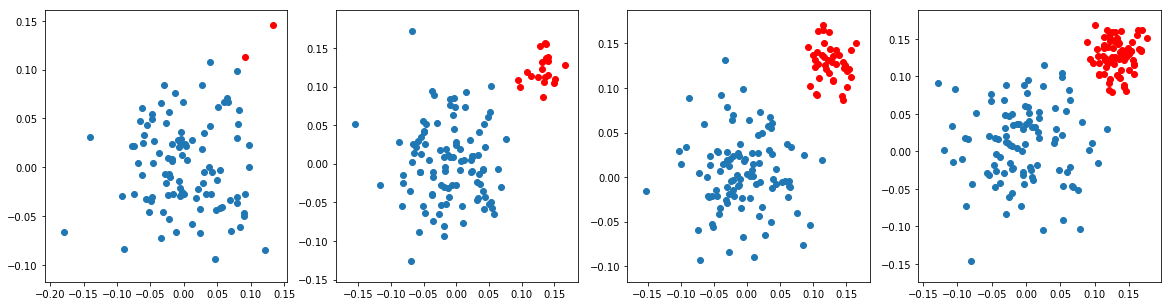

In [3]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

## Task 1: Applying SVM 

In [4]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

def plot_support_vectors(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()                     # to get the current polar axes
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='black',levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=100, linewidth=0.5, facecolors='yellow');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

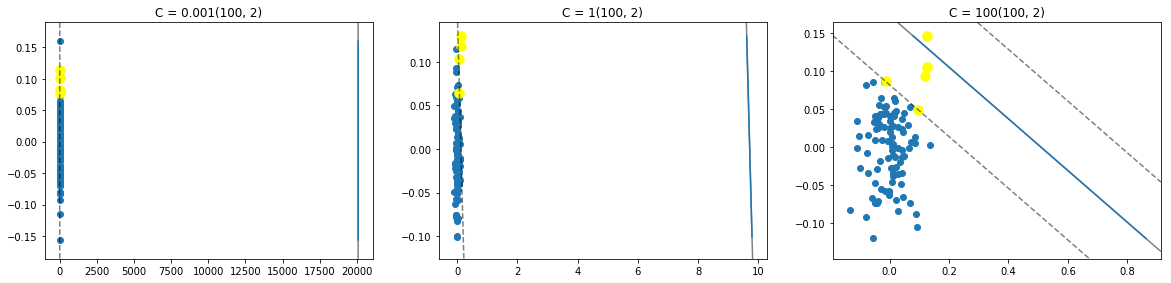

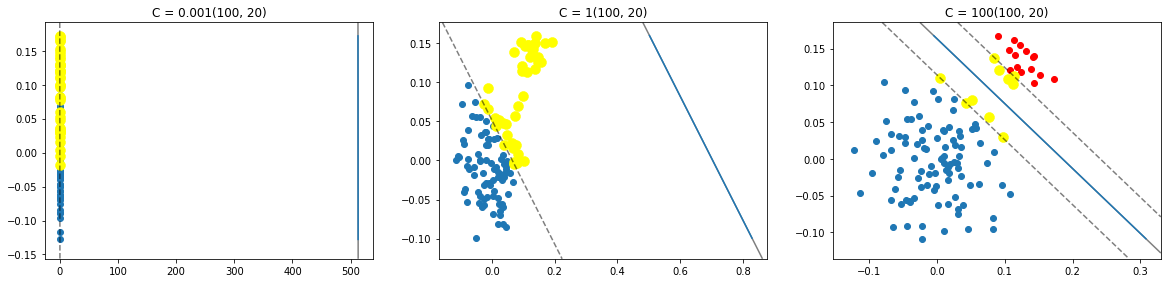

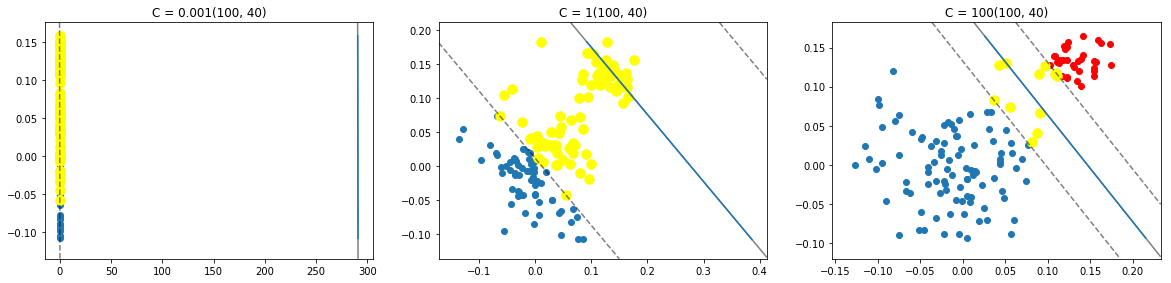

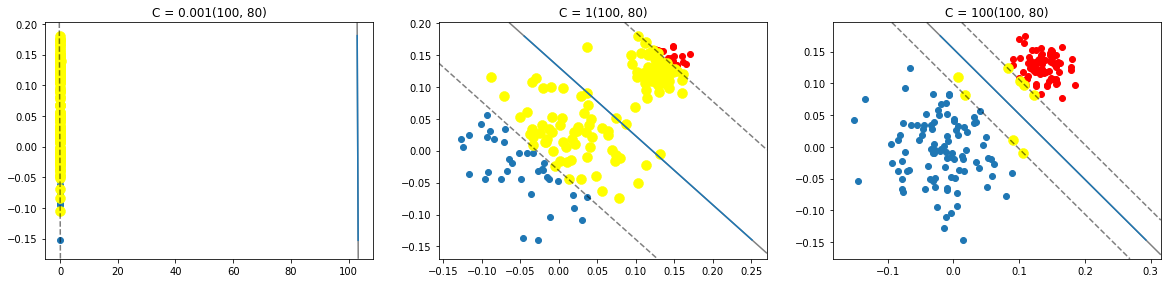

In [5]:
r_strength = [0.001,1,100]

ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
number=1
for j,i in enumerate(ratios):
    plt.figure(figsize = (20,20))
    for k in range(0, 3):
        model=SVC(C= r_strength[k],kernel = 'linear')          # provides regularization stregth and linear kernel
        plt.subplot(4, 3, number) 
        number=number+1
        X_p=np.random.normal(0,0.05,size=(i[0],2))
        X_n=np.random.normal(0.13,0.02,size=(i[1],2))
        y_p=np.array([1]*i[0]).reshape(-1,1)
        y_n=np.array([0]*i[1]).reshape(-1,1)
        X=np.vstack((X_p,X_n))
        y=np.vstack((y_p,y_n))
        model.fit(X,y)
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        plt.title('C = '+ str(r_strength[k])+str(i))
        draw_line(coef=model.coef_[0],intercept=model.intercept_,mi=max(X[:,1]) ,ma= min(X[:,1]))
        plot_support_vectors(model)
    plt.show()

Observations :
    I applied SVM different regularization strength and observed following :
        1. For strengh = 0.001 , the model is not able to classify the data points , all the data points are in one corner 
        and hyperplane is in another corner. support vectors are also enable to differeniate from the data points.
        2. For strength = 1 , in the above two plots the data can not be classified well but in last cases, i observed that,
        the model can classify the data points. As the data get balanced the model seems to work well and represent 
        the support vactors well.
        3. For strength = 100, the models working fine but when the data get balanced. It indicates that this model does not 
        suits for imbalanced data sets but as the data get balanced the model works really fine.

## Task 2: Applying LR

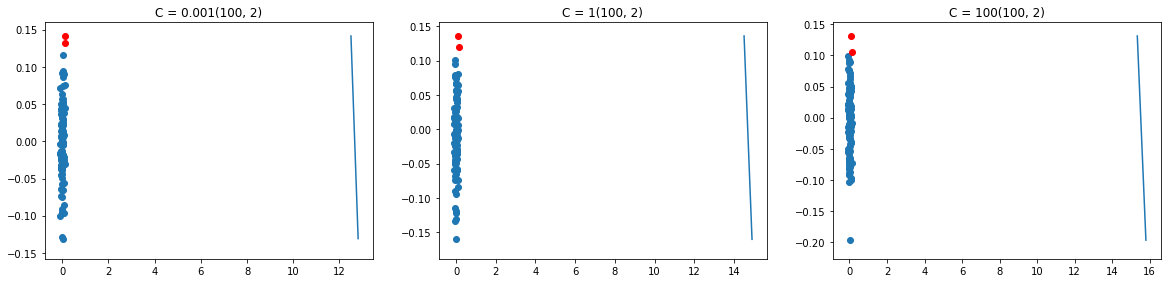

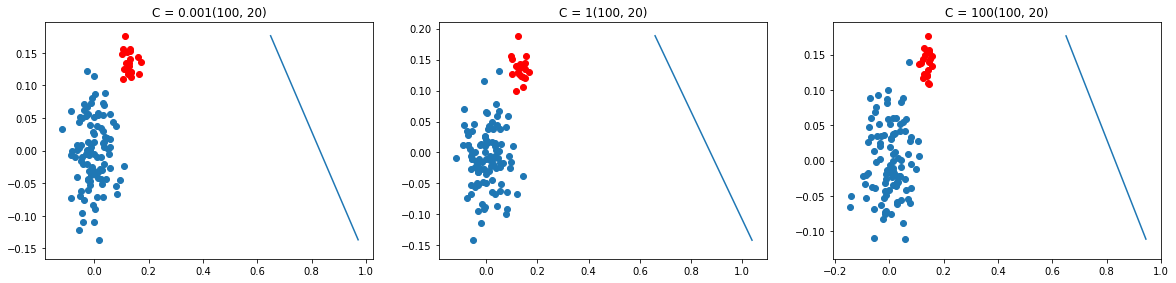

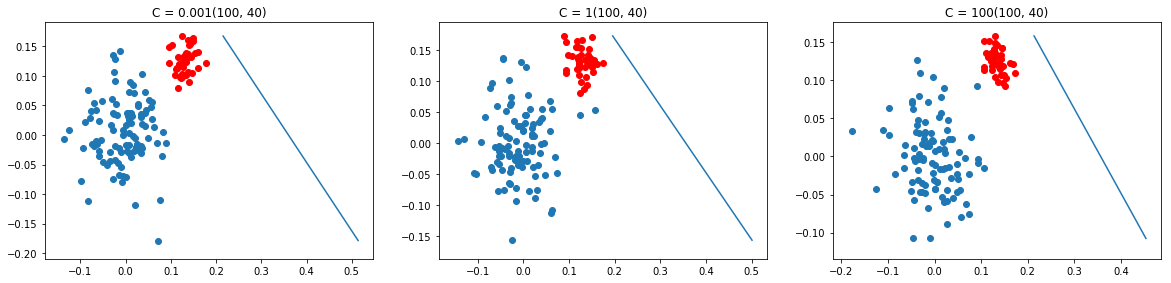

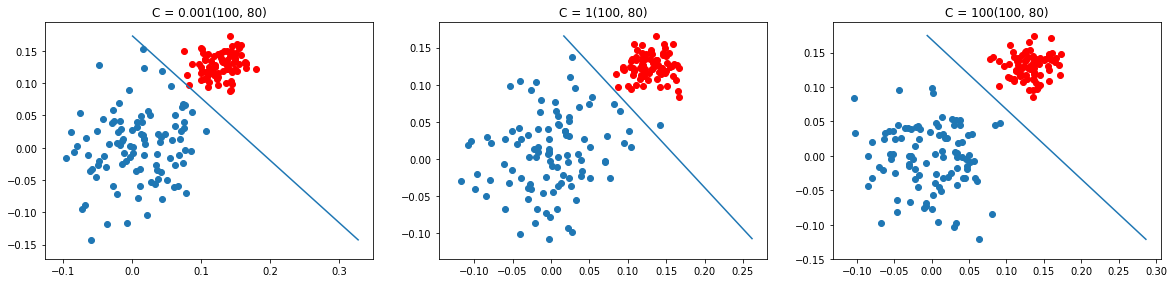

In [6]:
r_strength = [0.001,1,100]

ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
number=1
for j,i in enumerate(ratios):
    plt.figure(figsize = (20,20))
    for k in range(0, 3):
        model=LogisticRegression(random_state=0)
        plt.subplot(4, 3, number) 
        number=number+1
        X_p=np.random.normal(0,0.05,size=(i[0],2))
        X_n=np.random.normal(0.13,0.02,size=(i[1],2))
        y_p=np.array([1]*i[0]).reshape(-1,1)
        y_n=np.array([0]*i[1]).reshape(-1,1)
        X=np.vstack((X_p,X_n))
        y=np.vstack((y_p,y_n))
        model.fit(X,y)
        plt.scatter(X_p[:,0],X_p[:,1])
        plt.scatter(X_n[:,0],X_n[:,1],color='red')
        plt.title('C = '+ str(r_strength[k])+str(i))
        draw_line(coef=model.coef_[0],intercept=model.intercept_,ma=max(X[:,1]), mi= min(X[:,1]))
        
    plt.show()

Observations : I applied Logostic regression with different regularization strength and observed following :

    1. For strengh = 0.001 ,Like SVM, the model is not able to classify the data points , all the data points are in one corner and hyperplane is in another corner. but as the ratios increases it comes to classify ans seperate the data points .
    2. For strength = 1 and 100 in the above two plots the data can not be classified well but in last case, i observed that,the model can classify the data points. As the data get balanced the model seems to work well .
    